In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time

---
### Q1) How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

**Sol**: Let the final matrix be r, and the given matrices be a(n, k) and b(k, m).<br />
    We know that, $$ r[i, j] = \sum_{x = 1}^{k} a[i, x] \times b[x, j]$$
    $$\implies multiplications = n \times m \times k $$   
    $$\implies additions = n \times m \times (k - 1) $$

---
### **Q2)** Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [2]:
# Creating matrices as lists of lists n = 100, k = 100, m = 100
a = [[0] * 100] * 300
b = [[0] * 300] * 100

# also creating the result matrix
r = [[0] * 100] * 100

# Populating a and b with random numbers
for i in range(100):
    for j in range(300):
        a[j][i] = random.randint(1, 1000)
        b[i][j] = random.randint(1, 1000)

In [3]:
tracker = np.array([0, 0], dtype = np.float64)
for x in range(100):
    t1 = time.time()
    # Multiplying using three for loops
    for i in range(100):
        for j in range(100):
            for k in range(300):
                r[i][j] += a[k][i] * b[j][k]
    t2 = time.time()
    tracker[0] += t2 - t1
    tracker[1] += (t2 - t1) ** 2

tracker /= 100
tracker[1] = (tracker[1] - tracker[0] ** 2)**(0.5)
print(f"Mean: {tracker[0]} s")
print(f"SD: {tracker[1]}")

Mean: 0.5202807998657226 s
SD: 0.018784372510290623


In [4]:
# Creating numpy arrays
a_np = np.array(a)
b_np = np.array(b)
r_np = np.zeros((100,100))

In [5]:
tracker = np.array([0, 0], dtype = np.float64)
for i in range(100):
    t1 = time.time()
    # Using matmul function in numpy
    r_np = np.matmul(a_np, b_np)
    t2 = time.time()
    tracker[0] += t2 - t1
    tracker[1] += (t2 - t1) ** 2

tracker /= 100
tracker[1] = (tracker[1] - tracker[0] ** 2)**(0.5)
print(f"Mean: {tracker[0]} s")
print(f"SD: {tracker[1]}")

Mean: 0.0052210259437561034 s
SD: 0.00024107447076234022


1. Since numpy arrays are arrays declared statically as opposed to dynamic typing, the data structure of the each element of the array will be int64 and there would be no additional members for managing the data type unlike python data types(int). As a result there would be a reduction in the amount of overhead for accessing and modifying each element of the array.
2. Additionally the matmul function in python makes use of the BLAS library which has implementations that can reduce the time complexity from $ n ^ {3} $ to $ n ^ {2.32}$.
3. Numpy also makes use SIMD Vector Processing unit for greater parallel processing to increase the speed of computation.
4. Elements of list are not necessarily contiguous whereas the numpy array elements are contiguous, as a result due to spacial locality cache utilization is higher.

---
### Q3) Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

**Sol:** 
Clearly the we need to find the ith highest element by performing $i$ passes, and for each pass
$$ T(n) = O(n)$$ 
To find the median we need to find the $ n/2 ^{th} $ highest element in the array
$$ \implies T(n) = O(n \times n/2) $$
$$ \implies T(n) = O(n^{2}) $$
<br />
We can improve the algorithm by using divide and conquer method or sorting method to achieve a time complexity of $O(n \times log(n))$

In [6]:
# Defining the given method
def given_method(arr):
    mx = 0
    temp = arr.copy()
    n = arr.shape[0]
    for i in range(n//2):
        mx = np.max(temp)
        temp = np.delete(temp, temp.argmax())
    if (n%2 == 0):
        return (temp.max() + mx)/2
    else:
        return temp.max()

# Testing the given method
arr = np.random.randint(0, 100, 9)
print("My Median:", given_method(arr))
print("np median:", np.median(arr))

My Median: 75
np median: 75.0


In [7]:
# Defining the better method
def better_method(arr):
    n = arr.shape[0]
    temp = np.sort(arr)
    if (n%2 == 0):
        return temp[(n-1)//2] + temp[n//2]
    else:
        return temp[(n)//2]

# Testing the given method
arr = np.random.randint(0, 100, 9)
print("My Median:", better_method(arr))
print("np median:", np.median(arr))

My Median: 69
np median: 69.0


In [8]:
# checking for multiple values of n
np_med = []
giv_med = []
bet_med = []
for n in range(10, 1100, 10):
    np_med.append([0, 0]) # least, mean, highest
    giv_med.append([0, 0])
    bet_med.append([0, 0])
    # Running for multiple iterations
    for j in range(100):
        # Defining the array
        arr = np.random.randint(0, 1000, (n))
        t1 = time.time()
        given_method(arr)
        t2 = time.time()
        giv_med[-1][1] += ((t2 - t1) ** 2)
        giv_med[-1][0] += t2 - t1
        t1 = time.time()
        better_method(arr)
        t2 = time.time()
        bet_med[-1][1] += ((t2 - t1) ** 2)
        bet_med[-1][0] += t2 - t1
        t1 = time.time()
        np.median(arr)
        t2 = time.time()
        np_med[-1][1] += ((t2 - t1) ** 2)
        np_med[-1][0] += t2 - t1

# Calculating the mean and the STD of the time taken for each n
np_med = np.array(np_med)/100
giv_med = np.array(giv_med)/100
bet_med = np.array(bet_med)/100
np_med[:, 1] = np.sqrt(np_med[:, 1] - np.square(np_med[:, 0]))
giv_med[:, 1] = np.sqrt(giv_med[:, 1] - np.square(giv_med[:, 0]))
bet_med[:, 1] = np.sqrt(bet_med[:, 1] - np.square(bet_med[:, 0]))

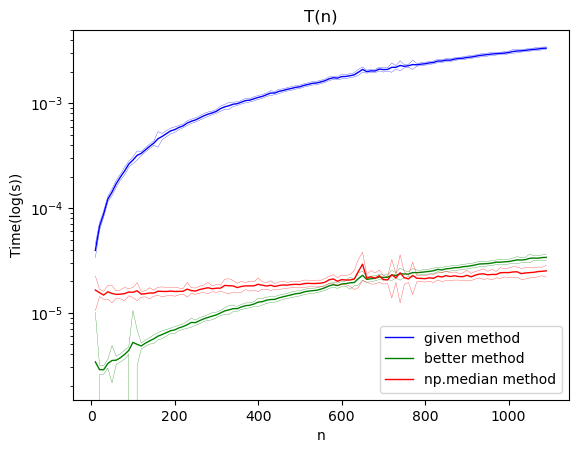

In [9]:
# Plotting the results
import matplotlib.pyplot as plt
plt.title("T(n)")
plt.ylabel("Time(log(s))")
plt.xlabel("n")
plt.yscale('log')
plt.plot(np.arange(10, 1100, 10), giv_med[:, 0] + giv_med[:,1],  color="blue", linewidth=0.2)
plt.plot(np.arange(10, 1100, 10), giv_med[:, 0], color="blue", linewidth=1, label="given method")
plt.plot(np.arange(10, 1100, 10), giv_med[:, 0] - giv_med[:, 1], color="blue", linewidth=0.2)
plt.plot(np.arange(10, 1100, 10), bet_med[:, 0] + bet_med[:,1],  color="green", linewidth=0.2)
plt.plot(np.arange(10, 1100, 10), bet_med[:, 0], color="green", linewidth=1, label="better method")
plt.plot(np.arange(10, 1100, 10), bet_med[:, 0] - bet_med[:, 1], color="green", linewidth=0.2)
plt.plot(np.arange(10, 1100, 10), np_med[:, 0] + np_med[:, 1],  color="red", linewidth=0.2)
plt.plot(np.arange(10, 1100, 10), np_med[:, 0], color="red", linewidth=1, label="np.median method")
plt.plot(np.arange(10, 1100, 10), np_med[:, 0] - np_med[:, 1], color="red", linewidth=0.2)
plt.legend()
plt.show()

Clearly the rate of increase of time taken with size of the array is greater for both the algorithms using the given method and using sorting.
<br />
The standard deviation of time taken for the given method is less because it does not depend on the relative ordering of elements

---
### Q4) What is the gradient of the following function with respect to x and y?
 $$ f(x, y) = x ^ {2} y + y ^ {3} sin(x)$$

**Sol:** $$ \frac{df}{dx} = 2xy + y ^{3}cos(x)  $$  
$$ \frac{df}{dy} = x ^ {2} + 3y ^{2}sin(x) $$

---
### Q5) Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [10]:
import jax
from jax import grad
import jax.numpy as jnp

In [11]:
grad??

In [12]:
# Declaring the function(for use with jax)
def f(x, y):
    return (x ** 2) * y + (y ** 3) * jnp.sin(x)

# Declaration of the gradient functions(analytical)
def dfdx(x, y):
    return 2 * x * y + (y ** 3) * np.cos(x)
def dfdy(x, y):
    return x ** 2 + 3 * (y ** 2) * np.sin(x)

for i in range(4):
    X, Y = random.random(), random.random()
    print(f"WRT(x) jax :", ("%.2f" % grad(f, 0)(X , Y)), "my-function: ", "%.2f"%dfdx(X, Y), end=' || ')
    print(f"WRT(y) jax :", ("%.2f" % grad(f, 1)(X , Y)), "my-function: ", "%.2f"%dfdy(X, Y))
    

WRT(x) jax : 0.13 my-function:  0.13 || WRT(y) jax : 0.49 my-function:  0.49
WRT(x) jax : 0.68 my-function:  0.68 || WRT(y) jax : 0.46 my-function:  0.46
WRT(x) jax : 0.24 my-function:  0.24 || WRT(y) jax : 0.17 my-function:  0.17
WRT(x) jax : 0.29 my-function:  0.29 || WRT(y) jax : 0.33 my-function:  0.33


---
### Q6) Use sympy to confirm that you obtain the same gradient analytically.

In [13]:
import sympy
from sympy import symbols
from sympy.vector import gradient

In [14]:
# Declaring symbols
x, y = symbols('x y')
# Decalring the function
f = x * x * y + y * y * y*sympy.sin(x)

In [15]:
f.diff(x) # Differentiation wrt x

2*x*y + y**3*cos(x)

In [16]:
f.diff(y) # Diffenciation wrt to y

x**2 + 3*y**2*sin(x)

---
### Q7) Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

1. 2022
    1. Branch 1
        1. Roll Number: 1, Name: N, Marks:
            1. Maths: 100, English: 70 …
    2. Branch 2
2. 2023
    1. Branch 1
    2. Branch 2
3. 2024
    1. Branch 1
    2. Branch 2
4. 2025
    1. Branch 1
    2. Branch 2


In [17]:
database = {
    "2022" : {
    "Branch 1":{
        1:{
            "Roll Number": 20110224,
            "Name": "Venkata Sriman", 
            "Marks":{
                "Maths": 10, 
                "Physics": 8,
            },
        },
    },
    "Branch 2":{
        
    }
},
2023:{
    "Branch 1":{
        
    },
    "Branch 2":{
        
    }
},
2024:{
    "Branch 1":{
        
    },
    "Branch 2":{
        
    }
},
2025:{
    "Branch 1":{
        
    },
    "Branch 2":{
        
    }
},}

----
### Q8) Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [18]:
# Creating the student class
class Student:
    ''' Class of students '''
    def __init__(self, name, roll_no, marks = dict()):
        ''' Students(name, roll_no, marks = {})
            name : String,
            roll_no : Int,
            marks : Dictionary
        '''
        self.name = name
        self.roll_no = roll_no
        self.marks = marks.copy()
    def add_marks(self, subject, marks):
        ''' Add marks to the marks dictionary
            add_marks(subject, marks)
            subject : String,
            marks : float
        '''
        self.marks[subject] = marks
    def __repr__(self):
        return f"Name: {self.name}, Roll No: {self.roll_no}, Marks: {self.marks}"
        

In [19]:
# Creating the branch class
class Branch:
    ''' Branch class '''
    def __init__(self, name, students = list()):
        ''' 
        Branch(name, students = [])
        name : String,
        students = List(Student)
        '''
        self.name = name
        self.students = students.copy()
    def add_student(self, student):
        '''
        add_student(student)
        student: Student
        '''
        self.students.append(student)
    def __repr__(self):
        rep = self.name
        rep += ":"
        for i in range(len(self.students)):
            rep += f'\n\t\t{i + 1}. '
            rep += self.students[i].__repr__()
        return rep

In [20]:
# Creating the year class
class Year:
    ''' Year class'''
    def __init__(self, year, branches = list()):
        ''' 
        Year(year, branches = [])
        year : Int,
        branches : List(Branch)
        '''
        self.year = year
        self.branches = branches.copy()
    def add_branch(self, branch):
        '''
        add_branch(branch)
        branch : Branch
        '''
        self.branches.append(branch)
    def __repr__(self):
        rep = str(self.year)
        rep += ":"
        for i in range(len(self.branches)):
            rep += f'\n\t{i + 1}. '
            rep += self.branches[i].__repr__()
        return rep

In [21]:
years = [Year(2022, [Branch("Branch 1"), Branch("Branch 2")]), Year(2023, [Branch("Branch 1"), Branch("Branch 2")]), Year(2024, [Branch("Branch 1"), Branch("Branch 2")]), Year(2025, [Branch("Branch 1"), Branch("Branch 2")])]
# Adding Student to branch-1 of year-1
years[0].branches[0].add_student(Student("Venkata Sriman", 20110224, {"Maths" : 9}))

In [22]:
# Visualizing the data
for i in range(len(years)):
    print(f"{i+1}. ", years[i])

1.  2022:
	1. Branch 1:
		1. Name: Venkata Sriman, Roll No: 20110224, Marks: {'Maths': 9}
	2. Branch 2:
2.  2023:
	1. Branch 1:
	2. Branch 2:
3.  2024:
	1. Branch 1:
	2. Branch 2:
4.  2025:
	1. Branch 1:
	2. Branch 2:


---
### Q9) Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

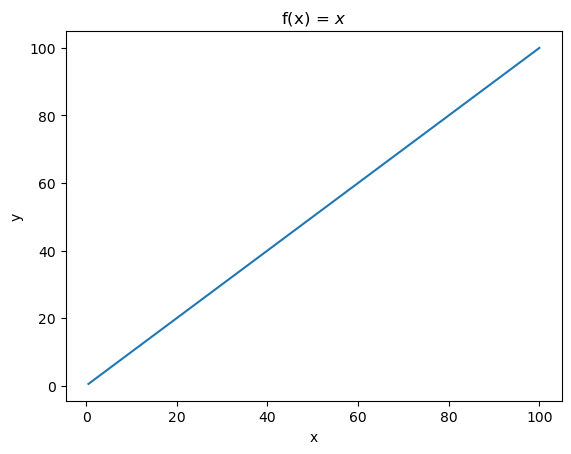

In [23]:
x = np.arange(0.5, 100.5, .5)
plt.title("f(x) = $x$")
plt.ylabel("y")
plt.xlabel("x")
plt.plot(x, x)
plt.show()

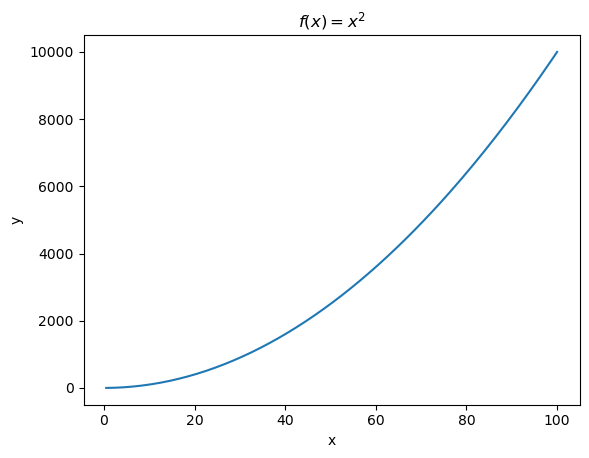

In [24]:
plt.title("$f(x) = x^{2}$")
plt.ylabel("y")
plt.xlabel("x")
plt.plot(x, np.square(x))
plt.show()

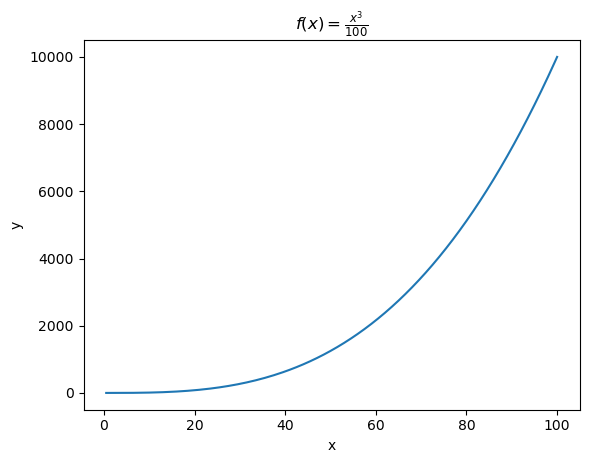

In [25]:
plt.title(r"$f(x) = \frac{x^{3}}{100}$")
plt.ylabel("y")
plt.xlabel("x")
plt.plot(x, np.power(x, 3)/100)
plt.show()

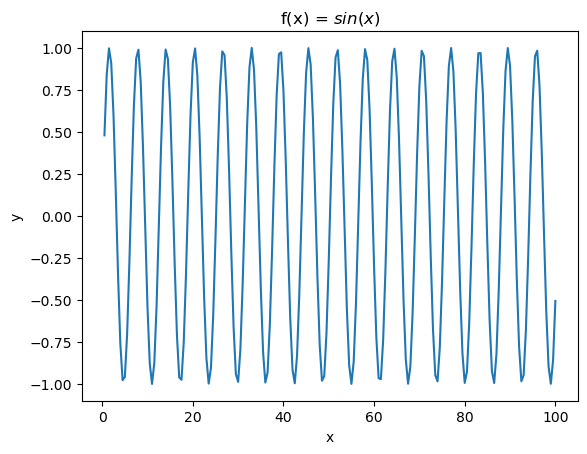

In [26]:
plt.title("f(x) = $sin(x)$")
plt.ylabel("y")
plt.xlabel("x")
plt.plot(x, np.sin(x))
plt.show()

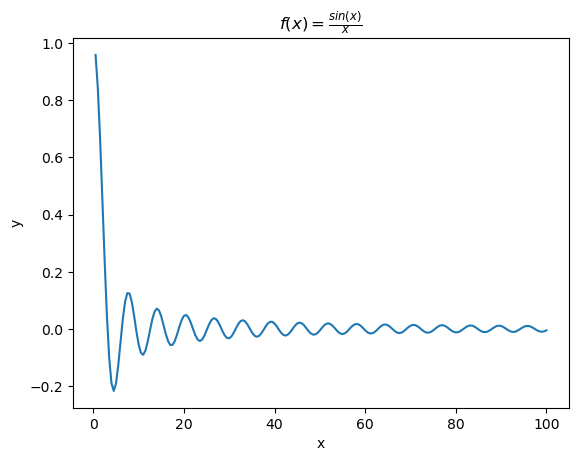

In [27]:
plt.title(r"$f(x) = \frac{sin(x)}{x}$")
plt.ylabel("y")
plt.xlabel("x")
plt.plot(x, np.sin(x)/x)
plt.show()

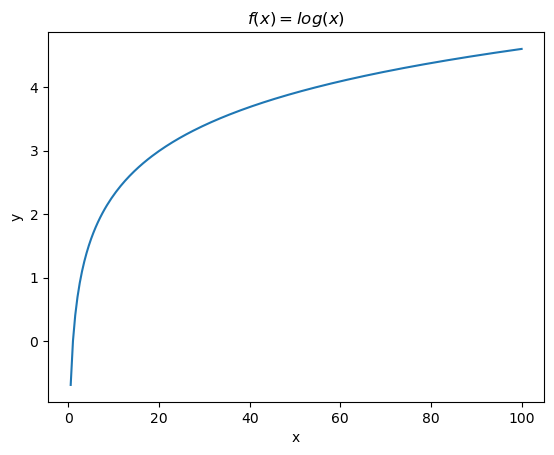

In [28]:
plt.title(r"$f(x) = log(x)$")
plt.ylabel("y")
plt.xlabel("x")
plt.plot(x, np.log(x))
plt.show()

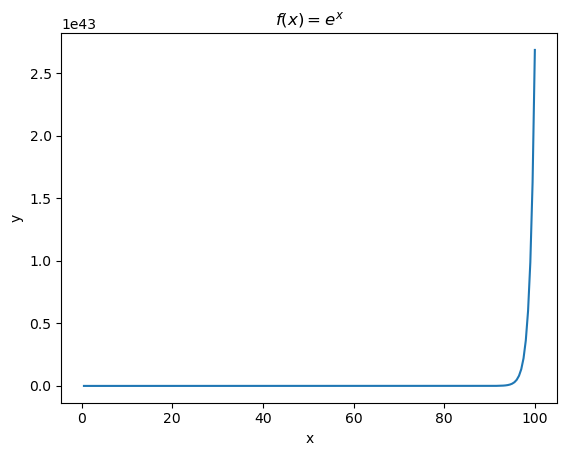

In [29]:
plt.title(r"$f(x) = e^{x}$")
plt.ylabel("y")
plt.xlabel("x")
plt.plot(x, np.exp(x))
plt.show()

### Q10) Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [30]:
# Creating a matrix of shape(20x5)
arr = np.random.random((20, 5)) + 1

# Defining the column names
column_names = ['a', 'b', 'c', 'd', 'e']

# Creating the dataframe
df = pd.DataFrame(arr, columns=column_names)

# Visualize
df.head()

a         b         c         d         e
0  1.818370  1.247481  1.802545  1.473576  1.812560
1  1.536296  1.220849  1.096129  1.373259  1.108820
2  1.353867  1.856863  1.126556  1.745486  1.485835
3  1.497563  1.564387  1.060358  1.893876  1.705030
4  1.635283  1.239262  1.556028  1.216992  1.791157

In [31]:
# Column with highest std
print(f"Column with highest std: {df.columns[np.argmax(np.std(df, axis = 0))]}")

Column with highest std: c


In [32]:
# Row with the lowest mean
print(f"row with the lowest mean: {np.argmin(np.mean(df, axis = 1)) + 1} (1 indexing)")

row with the lowest mean: 2 (1 indexing)


### Q11) Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [33]:
# Creating the Fth column of the dataframe
df['f'] = np.sum(df, axis=1)

In [34]:
df.head()

a         b         c         d         e         f
0  1.818370  1.247481  1.802545  1.473576  1.812560  8.154531
1  1.536296  1.220849  1.096129  1.373259  1.108820  6.335353
2  1.353867  1.856863  1.126556  1.745486  1.485835  7.568607
3  1.497563  1.564387  1.060358  1.893876  1.705030  7.721213
4  1.635283  1.239262  1.556028  1.216992  1.791157  7.438721

In [35]:
# Creating the Gth column of the dataframe
df['g'] = np.where(df.f < 8, "LT8", "GT8")

In [36]:
df.head(10)

a         b         c         d         e         f    g
0  1.818370  1.247481  1.802545  1.473576  1.812560  8.154531  GT8
1  1.536296  1.220849  1.096129  1.373259  1.108820  6.335353  LT8
2  1.353867  1.856863  1.126556  1.745486  1.485835  7.568607  LT8
3  1.497563  1.564387  1.060358  1.893876  1.705030  7.721213  LT8
4  1.635283  1.239262  1.556028  1.216992  1.791157  7.438721  LT8
5  1.239694  1.925369  1.532892  1.337223  1.216973  7.252151  LT8
6  1.390160  1.877331  1.366269  1.787526  1.987805  8.409090  GT8
7  1.335781  1.100802  1.085656  1.333016  1.727789  6.583044  LT8
8  1.803831  1.833637  1.664679  1.002978  1.772654  8.077779  GT8
9  1.533996  1.643822  1.470561  1.936426  1.724608  8.309413  GT8

In [37]:
# Number of rows where df['g'] = 'LT8'
print(np.sum(df['g'] == 'LT8'))

14


In [38]:
print(f"For LT8 : {np.std(df['f'][df['g'] == 'LT8'])} || For GT8: {np.std(df['f'][df['g'] == 'GT8'])}")

For LT8 : 0.4869391148283817 || For GT8: 0.16106237206127594


---
### Q12) Write a small piece of code to explain broadcasting in numpy.

**Sol:**
<br />
*Step 1* : Pad the dimensions of the array with lower number of dimesion with ones.
<br />
*Step 2* : If the shape of an arrays in a given dimensions vary and shape of one of the array in that dimension is 1(else raises error) then stretch it to match with the other.
*Step 3*: Perform the operation.

In [39]:
# Examples
A = np.random.randint(1, 10, (4,4))
print(f'A :\n {A}')
print(f'\nA + 10 :\n {A + 10}')
print(f'\nA == 3 :\n {A == 3}')

A :
 [[8 9 1 1]
 [6 8 2 8]
 [8 3 4 4]
 [9 2 4 4]]

A + 10 :
 [[18 19 11 11]
 [16 18 12 18]
 [18 13 14 14]
 [19 12 14 14]]

A == 3 :
 [[False False False False]
 [False False False False]
 [False  True False False]
 [False False False False]]


In [40]:
B = np.array([[[7, 6, 7, 9, 4, 8, 9, 7, 4, 4,],
              [9, 5, 3, 4, 8, 5, 2, 2, 1, 2,]]])
C = np.array([3, 9, 4, 4, 4, 7, 2, 2, 9, 6,])
print(f'B :\n {B}')
print(f'\nB.shape :\n {B.shape}')
print(f'\nC :\n {C}')
print(f'\nC.shape :\n {C.shape}')
print(f'\nC + B :\n {B + C}')

B :
 [[[7 6 7 9 4 8 9 7 4 4]
  [9 5 3 4 8 5 2 2 1 2]]]

B.shape :
 (1, 2, 10)

C :
 [3 9 4 4 4 7 2 2 9 6]

C.shape :
 (10,)

C + B :
 [[[10 15 11 13  8 15 11  9 13 10]
  [12 14  7  8 12 12  4  4 10  8]]]


*Step 1:* 
~~~
C.shape = (1, 1, 10)
C = [[[3 9 4 4 4 7 2 2 9 6]]]
~~~
*Step 2:*
~~~
C.shape = (1, 2, 10)
C = [[[3 9 4 4 4 7 2 2 9 6],
      [3 9 4 4 4 7 2 2 9 6]]]
~~~
*Step 3:*
~~~
C + B = [[[10 15 11 13  8 15 11  9 13 10],
          [12 14  7  8 12 12  4  4 10  8]]]
~~~

---
### Q13) Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [41]:
def dup_argmin(arr):
    '''
    dup_argmin(arr)
    arr : Numpy array,
    returns : the index of minimum value of the array 
    '''
    temp = arr.flatten()
    # Index of the minimum value
    index = 0
    # The minimum value
    mn = temp[0]
    for i in range(temp.shape[0]):
        if ((temp[i] < mn)):
            mn = temp[i]
            index = i
    return index
        

In [42]:
a = np.random.randint(1, 100, (3,3,3))

print(f"a : \n{a}\n")

print(f"My Function : {dup_argmin(a)} || argmin : {np.argmin(a)}")

a : 
[[[88 59 95]
  [88  7 70]
  [27 37 27]]

 [[35  8 30]
  [78  2 14]
  [95 93  6]]

 [[92 13 35]
  [69 54 70]
  [71 26 85]]]

My Function : 13 || argmin : 13
